<a href="https://colab.research.google.com/github/DilyaraKayumovna/-/blob/main/%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: ознакомиться с данными и составить аналитический отчёт.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Data Sample (AIC) для итоговой работы .xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


## **Подготовка** **данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54214 non-null  object        
 1   StockCode    54214 non-null  object        
 2   Description  54080 non-null  object        
 3   Quantity     54214 non-null  int64         
 4   InvoiceDate  54214 non-null  datetime64[ns]
 5   UnitPrice    54214 non-null  float64       
 6   CustomerID   40643 non-null  float64       
 7   Country      54214 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
# cтолбец CustomerID имеет много пропусков, пропуски оставляем, ничем заполнить их не можем, если удалить, 
# потеряем 25% данных, это много
# CustomerID имеет числовой тип, переведем в тип object
df['CustomerID'] = df['CustomerID'].astype(object)

In [ ]:
df.describe()

,Quantity,UnitPrice
count,54214.000000,54214.000000
mean,9.610802,4.307341
std,57.358422,47.834496
min,-9600.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,2400.000000,6930.000000


In [ ]:
# видим, что количество товара (Quantity) имеет отрицательное значение, чего быть не должно
# цена за штуку (UnitPrice) имеют нулевые значения, этого быть не может

In [ ]:
# посмотрим, много ли позиций с нулевым значением UnitPrice
df.loc[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
730,536995,35951,NaN,57,2010-12-03 15:29:00,0.0,NaN,United Kingdom
731,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
732,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,NaN,United Kingdom
733,537009,84534B,NaN,-80,2010-12-03 15:38:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
51508,579743,21810,check,-135,2011-11-30 14:36:00,0.0,NaN,United Kingdom
52171,580359,20775,NaN,-35,2011-12-02 16:11:00,0.0,NaN,United Kingdom
53536,581207,21688,mixed up,-337,2011-12-07 18:34:00,0.0,NaN,United Kingdom
53537,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom


In [ ]:
# удалим строки с нулевым значением UnitPrice
df_new = df.drop(df[df['UnitPrice'] == 0].index)

In [ ]:
# посмотрим, много ли позиций с отрицательным количеством товара
df_new.loc[df_new['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2010-12-01 14:33:00,1.45,12472,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,2010-12-02 11:56:00,5.95,14390,United Kingdom
...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,2011-12-08 10:14:00,0.85,12558,USA
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558,USA
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2011-12-08 11:51:00,2.95,18223,United Kingdom
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2011-12-08 11:57:00,0.42,15877,United Kingdom


In [ ]:
# отрицательные значения оставить не можем, поскольку они исказят значения выручки.
# примем, что произошла опечатка и заменим минусы на положительные значения.
# хотя, нужно уточнить, была ли опечатка или данные не верны, и их следует удалить или же таким образом указаны возвраты

In [ ]:
df_new['Quantity'][df_new['Quantity'] < 0] = df_new['Quantity'] * -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.describe()

,Quantity,UnitPrice
count,53989.000000,53989.000000
mean,10.489692,4.325292
std,38.294949,47.933260
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,2400.000000,6930.000000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53989 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    53989 non-null  object        
 1   StockCode    53989 non-null  object        
 2   Description  53989 non-null  object        
 3   Quantity     53989 non-null  int64         
 4   InvoiceDate  53989 non-null  datetime64[ns]
 5   UnitPrice    53989 non-null  float64       
 6   CustomerID   40639 non-null  object        
 7   Country      53989 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
# данные готовы для дальнейшего исследования

## **Анализ** **данных**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [ ]:
# посмотрим, в каких странах чаще делают заказы
df_analysis = df_new.groupby('Country').count()['Quantity'].sort_values(ascending = False).head(10)
df_analysis

Country
United Kingdom    49378
Germany             951
France              881
EIRE                787
Spain               253
Netherlands         234
Belgium             211
Switzerland         189
Portugal            152
Australia           130
Name: Quantity, dtype: int64

*Как видно из таблицы, чаще всего делают заказы в Великобритании. Также имеется довольно большая активность клиентов по частоте заказов в  Германии, Франции и Ирландии*

In [ ]:
# создадим новый столбец, в котором посчитаем выручку по каждой позиции
df_new['total'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850,United Kingdom,22.00


In [ ]:
# посмотрим топ-10 стран, приносящих максимальную выручку
df_analysis2 = df_new.groupby('Country').sum()['total'].sort_values(ascending = False).head(10)
df_analysis2

Country
United Kingdom    939628.821
EIRE               30574.080
Netherlands        26710.580
Germany            24893.120
France             20149.970
Australia          17240.220
Switzerland         6222.500
Sweden              6124.520
Spain               5986.860
Portugal            4557.790
Name: total, dtype: float64

*Как видно из таблицы, основной объем выручки приходится на внутренний рынок. Также большую прибыль приносят Ирландия, Нидерланды, Германия, Франция и Австралия*

In [ ]:
# посмотрим, как распределена выручка в зависимости от года и месяца
df_new['month_'] = df_new['InvoiceDate'].dt.strftime('%b')
df_new['year_'] = df_new['InvoiceDate'].dt.strftime('%Y')
df_analysis3 = df_new.groupby(["month_", 'year_'])['total'].sum().sort_values(ascending=False)
df_analysis3

month_  year_
Nov     2011     162891.240
Oct     2011     117721.050
Sep     2011     107561.401
Aug     2011      89977.960
May     2011      86225.440
Dec     2010      82586.720
Mar     2011      80830.180
Jul     2011      79266.680
Jun     2011      79196.960
Jan     2011      67922.680
Apr     2011      54151.210
Feb     2011      53537.120
Dec     2011      50371.450
Name: total, dtype: float64

*По полученным данным не наблюдается явная динамика по объему выручки в зависимости от месяца, однако можно обратить внимание, что осенью была самая большая выручка.*

In [ ]:
# посмотрим, какие клиенты являются самыми активными
df_analysis4 = df_new.groupby(['CustomerID', 'Country']).agg({'total': 'sum', 'Quantity': 'count'}).sort_values(by = 'total', ascending = False).head(30)

In [ ]:
df_analysis4.style.bar(align='mid')

,,total,Quantity
CustomerID,Country,,
17450.0,United Kingdom,27766.740000,42
18102.0,United Kingdom,26533.440000,43
14646.0,Netherlands,25725.560000,195
16029.0,United Kingdom,16342.280000,27
12415.0,Australia,16174.970000,86
14911.0,EIRE,15802.270000,563
14156.0,EIRE,12409.510000,143
17949.0,United Kingdom,12048.080000,8
12931.0,United Kingdom,10552.200000,16


*Как видно из полученной таблицы, основное количество активных клиентов приходится на Великобританию.  Можно заметить, что практически весь объем выручки в Нидерландах и Австралии приходится на одного клиента в каждом регионе. В Ирландии также практически весь объем делают два клиента.*


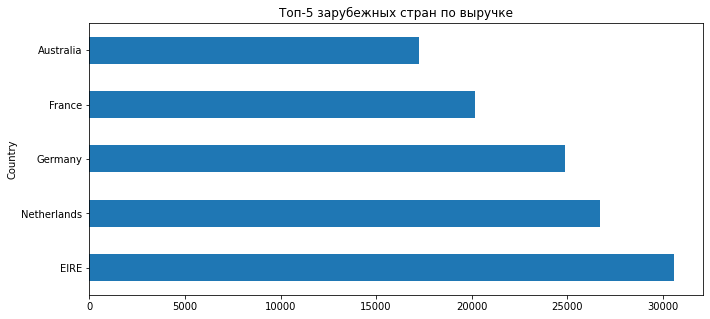

In [ ]:
# ещё раз более прицельно посмотрим, какие страны (помимо United Kingdom) приносят максимальную выручку
df_without_UK = df_new.loc[df_new['Country']!='United Kingdom']

df_analysis5 = df_without_UK.groupby('Country').sum()['total'].sort_values(ascending = False).head(5)

df_analysis5.plot(kind='barh', title='Топ-5 зарубежных стран по выручке')

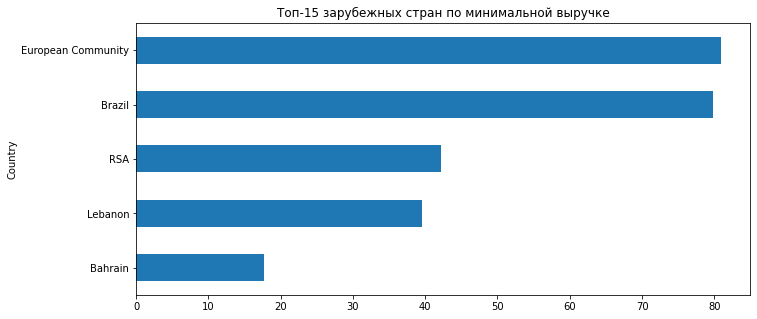

In [ ]:
# выведем, какие страны приносят минимальную выручку
df_analysis6 = df_without_UK.groupby('Country').sum()['total'].sort_values(ascending = True).head(5)

df_analysis6.plot(kind='barh', title='Топ-15 зарубежных стран по минимальной выручке')


In [ ]:
# оценим внутренний рынок, выведем самые популярные товары на внутреннем рынке
df_UK = df_new.loc[df_new['Country']=='United Kingdom']

df_analysis7 = df_UK.groupby(['Description']).sum()['Quantity'].sort_values(ascending = False).head(5)
df_analysis7

Description
ASSORTED COLOUR BIRD ORNAMENT        4376
JUMBO BAG RED RETROSPOT              4268
ASSORTED COLOURS SILK FAN            4065
WORLD WAR 2 GLIDERS ASSTD DESIGNS    3940
RED  HARMONICA IN BOX                3570
Name: Quantity, dtype: int64

In [ ]:
# выясним, какие товары самые популярные на внешнем рынке
df_analysis8 = df_without_UK.groupby(['Description']).sum()['Quantity'].sort_values(ascending = False).head(5)
df_analysis8


Description
PACK OF 72 RETROSPOT CAKE CASES        2448
GINGHAM HEART DECORATION               1752
MINI PAINT SET VINTAGE                 1585
DOLLY GIRL LUNCH BOX                   1241
SET OF 60 PANTRY DESIGN CAKE CASES      913
Name: Quantity, dtype: int64

*По полученным данным видно, что на внутреннем и внешним рынках лидерами продаж являются разные товары*

## **Теоретическая** **часть**

Целью бизнес-заказчика является увеличение прибыли за счет увеличения продаж как на внутреннем рынке, так и на внешнем. 
Гипотетическими болями заказчика могут быть большие издержки на доставку товара и, как следствие, снижение прибыли, а также сложность удержания постоянных клиентов и привлечения достаточного количества новых.
Возможными решениями могут стать следующие действия:
- при работе с  постоянными клиентами продумать систему удержания, проверить гипотезы виральности
- для привлечения новых клиентов использовать различные маркетинговые инструменты. Для этого предварительно оценить рекламный рынок в разных регионах и т.о. спланировать бюджет рекламной кампании и его возможную эффективность. Также можно оценить конкуренцию по разным регионам (количество запросов) и в каком регионе какой продукт больше востребован, что можно использовать при разработке стратегии продвижения продукта.
- для привлечения клиентов и их удержания можно улучшить продукт
- для увеличения объема выручки можно увеличить географию сбыта товара


Стейкхолдерами для представленного интернет-магазина являются:
- инвесторы и собственник, которые участвуют в принятии стратегических решений, согласовывают бюджет и соответственно влияют на прибыль 
- поставщики, которые влияют на стоимость сырья, сроки и условия постивки, что напрямую связана с издержками компании и удовлетворенностью клиента
- потребители, которые выдвигают определенные требования к качеству товара, соответственно влияют на себестоимость и издержки
- сотрудники компании (аналитики, маркетологи, логистика), от деятельности которых зависит качество предоставляемых услуг, удовлетворенность клиента, качество оценки развития компании и эффективность выбранных маркетинговых инструментов


Центральной метрикой для данного интернет-магазина является ПРИБЫЛЬ, которая равна:

ПРИБЫЛЬ = ВЫРУЧКА- РАСХОДЫ

Поскольку это интернет-магазин, в РАСХОДАХ немалую долю занимают расходы на маркетинг, соответственно, используем метрики ROMI, чтобы понять, сколько заработает заказчик, вложив 1 денежную единицу в маркетинг и CARC для оценки эффективности.
Метриками роста количества клиентов могут быть MAU, КОЛИЧЕСТВО ЗАКАЗОВ, ARPPU.
Можно использовать LTV по различным сегментам, т.о. оценить зависимость покупальтельской активности от того, к какому сегменту он относится.
Важными метриками являются также RETENTION RATE и СРЕДНИЙ ЧЕК.
Также нужно использовать UNIT экономику для выявления узких мест, чтобы понять, что в большей степени влияет на выручку и при необходимости попытаться скорректировать ситуацию.
Поскольку товар доставляется по всему миру очень важной метрикой является ЗАТРАТЫ НА ЛОГИСТИКУ.


В дополнении к представленным данным в датасете, можно было бы добавить:
- данные о покупателях (их возраст, пол и др. информация), чтобы лучше понимать, кто наш потребитель, на кого ориентировать рекламу, спец. предложения и т.д., а также для более глубокого анализа данных
- дать общее название группе товаров (группировка товаров поможет оценить востребованность определенной группы товаров в определенном регионе и в определенный сезон)
- данные по возвратам, чтобы правильно оценивать выручку



Исследование представленных данных  показало:
- регионом, создающим основную выручку и делающих большее количество заказов, является Великобритания
- если оценивать выручку за тринадцать месяцев, то нет ярко выраженной тенденции, однако, нужно отметить, что осенью была максимальная выручка
- большинство активных клиентов живет в Великобритании
- самую большую выручку на внешнем рынке создают Ирландия, Нидерланды, Германия, Франция и Австралия
- самые большие продажи в других странах за представленный период времени обеспечиваются за счет 1-2 клиентов
- на внешнем и внутреннем рынках разные товары вызывают максимальный спрос
- в анализе также представлены 5 стран, приносящих минимальную выручку. Это Бахрейн, Ливан, Южная Африка, European Community

Выводы и рекомендации:
- по представленным данным основной объем продаж делают небольшое количество клиентов, они часто заказывают, значит, их всё устраивает и они довольны. Можно проверить различные гипотезы по привлечению новых клиентов по рекомендации от самых активных. Полезными будут положительные отзывы с фото и видео как о товарах, так и о самом магазине
- судя по данным, во многих странах очень маленькая выручка. Нужно еще раз оценить целесообразность продажи товаров в эти регионы, оправдано ли, окупаются ли расходы на рекламу и логистику. Возможно, стоит сконцентрироваться на странах, где имеется хороший спрос. Либо же нужно провести тщательный анализ рынка и маркетинговых инструментов для стран с маленькой выручкой. Возможно, выбрали неподходящие каналы продвижения, возможно продаваемые товары мало интересны потребителям либо их внутренний рынок насыщен подобными предложениями и нет никакого смысла заказывать их из другой страны
